In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60,000 images, 28 pixels height, 28 pixels width

grayscaled images, meaning only one color
only 1 channel

In [4]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

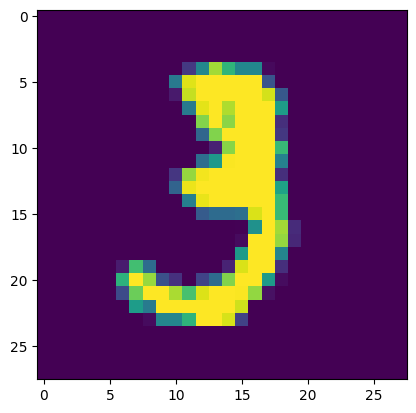

In [5]:
plt.imshow(X_train[10])

In [6]:
X_train[10].shape

(28, 28)

In [7]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


Using one hot encoding for the y values

In [9]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

Only the range of the image is changed, the image is not changed

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

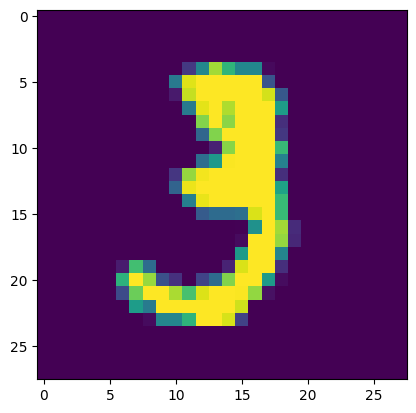

In [11]:
plt.imshow(X_train[10])

Building Neural Networks

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation= 'relu'),
    keras.layers.Dense(50, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid') #because total number of outputs is 10

])
    

/Users/apurbakoirala/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#training the neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.8488 - loss: 0.5114
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.9550 - loss: 0.1509
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.9679 - loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9752 - loss: 0.0833
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.9796 - loss: 0.0680
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.9828 - loss: 0.0568
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.9855 - loss: 0.0482
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.9877 - loss: 0.0414
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.9894 - loss: 0.0358
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9904 - loss: 0.0307


In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.9657 - loss: 0.1277


In [16]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


In [18]:
print(Y_pred[0]) #the values given are what are the probabilities of each class for an input here, 7 has 0.99

[5.1576944e-07 2.8043566e-03 1.9019264e-04 9.9708366e-01 6.8955174e-08
 6.7451715e-01 2.4064363e-15 9.9999398e-01 5.4759949e-02 9.8084623e-01]


In [19]:
label_for_first_test_image = np.argmax(Y_pred[0])

In [20]:
label_for_first_test_image

7

In [21]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [24]:
print(Y_pred_labels) #prediction for each X_test

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 3, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 